# ENGR 3703 Project - Background

The project involves a very common problem in engineering - the spring-mass-damper problem. It has applications in electrical and mechanical engineering and beyond. The basic problem is below:

![image info](./spring_mass_damper.jpg)

In the figure the variables and parameters have the following meaning:

- $m$ = mass (kg)
- $c$ = damping constant (kg/s) - proportional to the speed of $m$
- $k$ = spring constant (N/s/s) - proportional to the distance $m$ is from it's 
- $x(t)$ = position of $m$ as a function of time
- $F(t)$ = A force applied to $m$ as a function of time

As you go through the project think of an application... a good application is the suspension (springs and shocks or struts) in a car. As the car goes along a bumpy road the suspension responds to bumps (i.e. $F(t)$) by bouncing on springs (with constant $k$) and being damped from too much bouncing by a damper (i.e. shock absorbers) with damping constant $c$.



## Background - Unforced Systems ($F(t)=0$)
Applying Newton's Second Law to the system in the figure:

$\large m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + k x = F(t)$

Introducting a *dot* notation for the time derivatives and dividing through by $m$ gives:

$\large \ddot x + \frac{c}{m} \dot x + \frac{k}{m} x = \frac{F(t)}{m}$

One thing of interest is to solve for $x(t)$ the *homgenous* case... that is when $F(t)=0$. The easiest way to do this is to propose that the solution is of the form: $x(t)=C e^{\lambda t}$ where $C$ and $\lambda$ are unknown.

With this proposed solution $\ddot x = C \lambda^2 e^{\lambda t}$, and $\dot x = C \lambda e^{\lambda t}$. Substituting gives

$\large C \lambda^2 e^{\lambda t} + \frac{Cc}{m} \lambda e^{\lambda t} + \frac{Ck}{m} e^{\lambda t} = 0 
~~~\rightarrow~~~  (\lambda^2  + \frac{c}{m} \lambda + \frac{k}{m})C e^{\lambda t}  = 0$

Since $C e^{\lambda t}  = 0$ would be a trivial solution, we conclude that:

$\large \lambda^2  + \frac{c}{m} \lambda + \frac{k}{m} = 0$

Before proceeding it's good to introduce a quantity that is really important for oscillating/vibrating systems, the natural frequency, $\omega_n$. This is the angular frequency that an undamped system will tend to vibrate at (see other refs for examples of this):

$\large \omega_n = \sqrt{\frac{k}{m}}$

From the quadratic formula:

$\large \lambda = \frac{-\frac{c}{m} \pm \sqrt{(\frac{c}{m})^2 - 4 {\omega}_n^2}}{2}
= -\frac{c}{2m} \pm \sqrt{(\frac{c}{2m})^2 - {\omega}_n^2} $

The value of the damping constant $c$ that would cause the square root to go away in the equation above would be $c = 2m \omega_n$. This is known as the *critical damping constant*, $c_c$ - critical damping is when a system as shown in the figure is perfectly damped so that an oscillation can only begin to happen, but then the damper just barely stops the oscillations.

So let's define the ratio of the actual damping constant, c, to the critical damping constant to be be the dimensionless damping coefficient, 

$\large \zeta = \frac{c}{c_c}=\frac{c}{2m \omega_n}$ So that:

$\large \lambda = -\frac{c}{2m}\frac{\omega_n}{\omega_n} \pm \sqrt{(\frac{c}{2m})^2 (\frac{\omega_n}{\omega_n})^2 - {\omega}_n^2} = -\frac{c}{2m \omega_n}\omega_n \pm \sqrt{(\frac{c}{2m\omega_n})^2 {\omega}_n^2 - {\omega}_n^2} $

Finally,

$\large \lambda = -\zeta\omega_n \pm \omega_n \sqrt{\zeta^2 - 1} $

Note that $\zeta$ and $\omega_n$ are based on positive constants, $c$, $k$, and $m$ and so we can assume they will also be positive.

## Start of Project Code


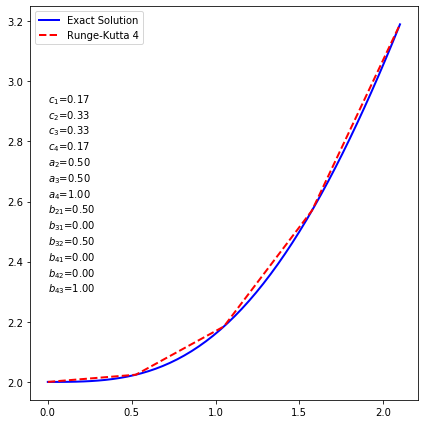

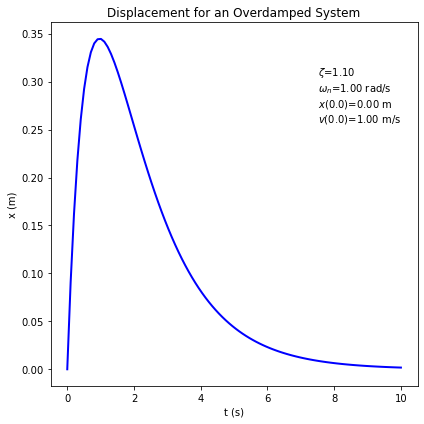

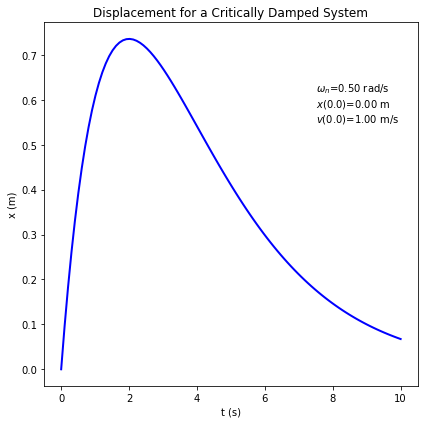

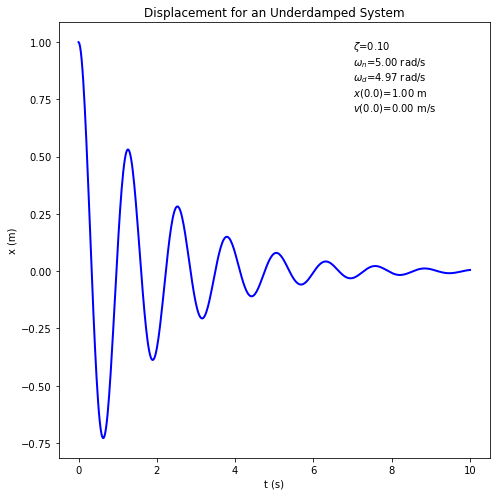

In [17]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"

def rk4(xi, yi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fxy(xi,yi)
    K2 = fxy(xi+a2*h,yi+b21*K1*h)
    K3 = fxy(xi+a3*h,yi+b31*K1*h+b32*K2*h)
    K4 = fxy(xi+a4*h,yi+b41*K1*h+b42*K2*h+b43*K3*h)   
    yip1 = yi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 5     #number of x values
h = (b-a)/(n-1)   #step size
x_rk4 = np.zeros(n)
y_rk4 = np.zeros(n)
iv = 2.0
y_rk4[0] = iv      #initial condition
x_rk4[0] = a

for i in range(1,n):
    x_rk4[i] = a + i*h
    y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    

iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"

    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_rk4,y_rk4,label="Runge-Kutta 4",color="r",linestyle="--",linewidth="2.0")
plt.text(0,2.3, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

def x_of_t(omega_n, t):
    return t*exp(-omega_n*t)
def v_of_t(omega_n, t):
    return exp(-omega_n*t)*(1-omega_n*t)

omega_n = 0.5

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(omega_n,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for a Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(omega_n,t[0])
v0 = v_of_t(omega_n,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

def x_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(cos(omega_d*t)+zeta*omega_n/omega_d*sin(omega_d*t))
def v_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-omega_d*sin(omega_d*t)-zeta*omega_n*cos(omega_d*t)+zeta*omega_n/omega_d*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))       

zeta = 0.1
omega_n = 5
omega_d = omega_n*sqrt(1-zeta**2)

ti = 0.
tf = 10.
t = np.linspace(ti,tf,500)
x = [x_of_t(zeta,omega_n,omega_d,tval) for tval in t]

fig = plt.figure(figsize=(7,7))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
omega_d_str = "\omega_d"
x0 = x_of_t(zeta,omega_n,omega_d,t[0])
v0 = v_of_t(zeta,omega_n,omega_d,t[0])
txt_loc_x = 0.70*tf
txt_loc_y = 0.70*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

### Three Possibilities for $\zeta = \frac{c}{c_c}$

#### Overdamped Systems: $c > c_c$

In this case the system can barely move and certainly cannot oscillate... In our car analogy, this would be a car with a very very stiff suspension. Every bump you hit - would get transmitted to the passengers in the car and be pretty uncomfortable.

In this case there would be two real roots: $\lambda_I$ and $\lambda_{II}$:

$\large \lambda_{I,II} = -\zeta\omega_n \pm \omega_n \sqrt{\zeta^2 - 1} $

But what do these roots look like... consider:

$\large \lambda_{I,II} = \omega_n(-\zeta \pm \sqrt{\zeta^2 - 1}) $

Since $\omega_n$ and $\zeta$ are both positive, if you were to take the $-$ of the $\pm$ (leading to finding $\lambda_{II}$), then you would clearly get a $\lambda_{II}$ that is negative:

$\large \lambda_{II} = -\omega_n(\zeta + \sqrt{\zeta^2 - 1}) $

For the case of $+$ of the $\pm$ and considering that $\zeta > \sqrt{\zeta^2 - 1}$:

$\large \lambda_{I} = -\omega_n(\zeta - \sqrt{\zeta^2 - 1}) $

*It will be the case that both $\lambda_I$ and $\lambda_{II}$ are negative*. So both solutions represent exponential decay:

$C_I e^{\lambda_I t}$ and $C_{II} e^{\lambda_{II} t}$

Recall for linear ODEs the sum of solutions is also a solution... so we end up with:

$\large x_{\small overdamped}(t) = C_I e^{\lambda_I t} + C_{II} e^{\lambda_{II} t}$

#### Overdamped Example

Let $x(o) = 0$ and $v(0)=1$ m/s. So that:

$x(0) = C_I + C_{II} = 0$   so   $C_{II} = -C_I$

and:

$v(0) = C_I \lambda_I + C_{II} \lambda_{II} = C_I(\lambda_I -\lambda_{II}) = 1
\rightarrow C_I = \frac{1}{\lambda_I -\lambda_{II}}$
   and $C_{II} = \frac{1}{\lambda_{II} -\lambda_I} $

$\large x(t) = \frac{1}{\lambda_I -\lambda_{II}} e^{\lambda_I t} + \frac{1}{\lambda_{II} -\lambda_I}e^{\lambda_{II} t} $

So now we need a value for $\zeta$ and for $\omega_n$. Just so we can visualize things let's take $\zeta$ = 1.1 and $\omega_n$ = 1 rad/s.


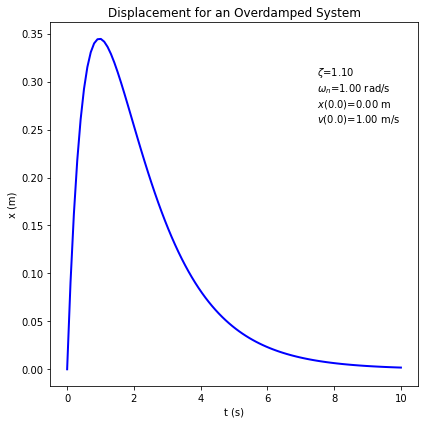

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#### Critically Damped Systems: $c = c_c$

In this case the system can start to being oscillations, but it is barely stopped from oscillating. In our car analogy, this would be a car with a pretty stiff suspension - but not too stiff... When you hit a bump the oscillation gets damped but no so quickly you feel it very much if at all... hence for car suspensions and many other physical systems, critical damping is the ideal case. In most real cases systems are very seldom critically damped. Even if critical damping is the goal, most real systems are actually underdamped slightly.

Returning to the possible values of $\lambda$ with $\zeta$ = 1:

$\large \lambda = -\zeta\omega_n \pm \omega_n \sqrt{\zeta^2 - 1} = -\omega_n $

So here we get a repeated root and $\lambda=-\omega_n$.

So one solution to the ODE is $C_I e^{-\omega_n t}$. What about other solutions?? It turns out that $C t e^{-\omega_n t}$ is also a solution (you can check this by inserting this in the original ODE... it's a decent amount of algebra, but doable).

$x_{\small critdamp} = C_I e^{-\omega_n t} + C_{II} t e^{-\omega_n t}$

#### Critically Damped Example

Let $x(0) = 0$ and $v(0)=1$ m/s. So that:

$x(0) = C_I = 0$ and $v(t) = C_{II} e^{-\omega_n t}(1-\omega_n t)$ and at $t=0~~~C_{II}=v(0)=1$ m/s.

So for this example:

$x(t) = t e^{-\omega_n t}$





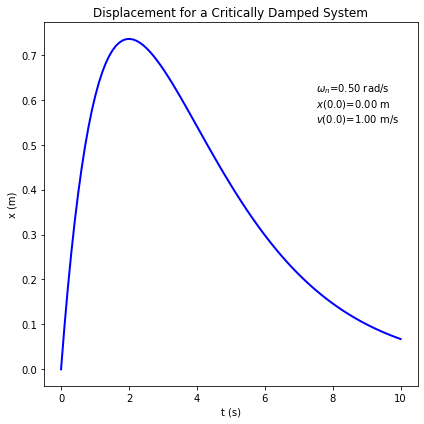

In [2]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(omega_n, t):
    return t*exp(-omega_n*t)
def v_of_t(omega_n, t):
    return exp(-omega_n*t)*(1-omega_n*t)

omega_n = 0.5

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(omega_n,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for a Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(omega_n,t[0])
v0 = v_of_t(omega_n,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#### Another Critically Damped Example

So now let's try some other boundary conditions. Let's use $x(0) = 1$ m, and $v(0) = 0$ m/s.

$x_{\small critdamp} = C_I e^{-\omega_n t} + C_{II} t e^{-\omega_n t}$

$x(0) = 1 = C_I$

For $C_I = 1, the form of v(t) for a critically damped system is:

$v(t) = \frac{dx}{dt} = e^{-\omega_n t} [C_{II} (1-\omega_n t) - \omega_n]$

$v(0) = 0 = C_{II} - \omega_n~~~\rightarrow~~~ C_{II} = \omega_n$

Now, rewriting - 

$x = e^{-\omega_n t} ( 1 + \omega_n t)$

Note also that:

$v = -{\omega}_n^2 t e^{-\omega_n t}$


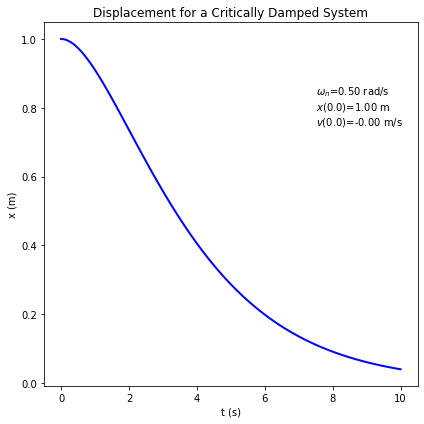

In [3]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(omega_n, t):
    return exp(-omega_n*t)*(1+ omega_n*t)
def v_of_t(omega_n, t):
    return -exp(-omega_n*t)*omega_n**2*t

omega_n = 0.5

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(omega_n,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for a Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(omega_n,t[0])
v0 = v_of_t(omega_n,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#### Underdamped Systems: $c < c_c~~~\zeta<1$

Now we get into more *complex* territory (pardon the pun...). Returning to the roots...

$\lambda = -\zeta\omega_n \pm \omega_n \sqrt{\zeta^2 - 1} $

So here, we will get a negative number under the square root.

$\sqrt{-1(1-\zeta^2)} =  i \sqrt{1-\zeta^2}  $ And we now have


$\lambda = -\zeta\omega_n \pm i \omega_n \sqrt{1-\zeta^2} $

Take note of the quantity $\omega_n \sqrt{1-\zeta^2}$. Also note, since $\zeta$ is less than one, that $ \sqrt{1-\zeta^2}$ will be less than one... so overall this quantity is a kind of a *reduced* frequency. This is due to damping, so this quantity is called the *damped natural frequency*, $\omega_d$ = $\omega_n \sqrt{1-\zeta^2}$ and our new roots are:

$\lambda = -\zeta\omega_n \pm i \omega_d $


$x_{\small underdamp} = C_I e^{(-\zeta\omega_n+i \omega_d)t} + C_{II} e^{(-\zeta\omega_n-i \omega_d)t}
 = e^{-\zeta\omega_n t} ( C_I e^{i \omega_d t} + C_{II} e^{-i \omega_d t})$
 
Recalling that $e^{i \theta} = cos{\theta} + i sin{\theta}$ one can rewrite $x(t)$ as:

$x(t) = e^{-\zeta\omega_n t} [ (C_I + C_{II})cos{\omega_d t} + i (C_I - C_{II})sin{\omega_d t} ]$

We will just take the real part of the solution and since $cos{\omega_d t}$ and $sin{\omega_d t}$ can both satisfy the real part of the solution, most sources just write the solution as:

$x_{\small underdamp}(t) = e^{-\zeta\omega_n t} [ D_I cos{\omega_d t} + D_{II} sin{\omega_d t} ]$

It's convenient to also have $v(t)$.

$v(t) = e^{-\zeta\omega_n t} [ -D_I ( \omega_d sin{\omega_d t} + \zeta \omega_n cos{\omega_d t}) + D_{II} (\omega_d cos{\omega_d t} - \zeta \omega_n sin{\omega_d t} ) ]$

#### Underdamped Example 

For the ICs we used in the last critically damped example: $x(0)=1$ m and $v(0)=0$ m/s we have:

$x(0) = 1 = D_I$

$v(0) = 0 = - \zeta \omega_n  + D_{II} \omega_d~~~\rightarrow~~~ D_{II} = \zeta \frac{\omega_n}{\omega_d} $

Finally!

$x(t) = e^{-\zeta\omega_n t} [ cos{\omega_d t} + \zeta \frac{\omega_n}{\omega_d} sin{\omega_d t} ]$

$v(t) = e^{-\zeta\omega_n t} [ -( \omega_d sin{\omega_d t} + \zeta \omega_n cos{\omega_d t}) +  \zeta \frac{\omega_n}{\omega_d}(\omega_d cos{\omega_d t} - \zeta \omega_n sin{\omega_d t} ) ]$








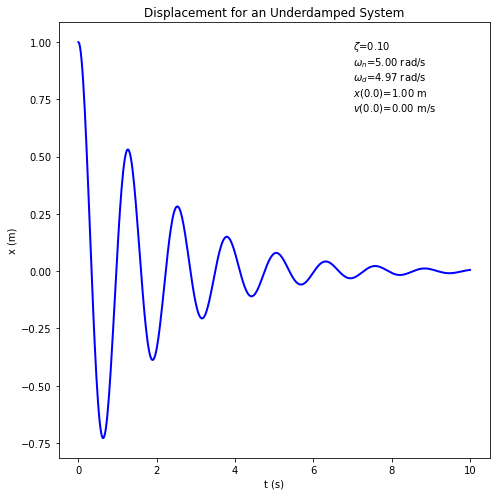

In [2]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(cos(omega_d*t)+zeta*omega_n/omega_d*sin(omega_d*t))
def v_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-omega_d*sin(omega_d*t)-zeta*omega_n*cos(omega_d*t)+zeta*omega_n/omega_d*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))       

zeta = 0.1
omega_n = 5
omega_d = omega_n*sqrt(1-zeta**2)

ti = 0.
tf = 10.
t = np.linspace(ti,tf,500)
x = [x_of_t(zeta,omega_n,omega_d,tval) for tval in t]

fig = plt.figure(figsize=(7,7))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
omega_d_str = "\omega_d"
x0 = x_of_t(zeta,omega_n,omega_d,t[0])
v0 = v_of_t(zeta,omega_n,omega_d,t[0])
txt_loc_x = 0.70*tf
txt_loc_y = 0.70*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

### Damped Systems - Putting it all together

In summary our solutions have been as follows:

#### Overdamped $\zeta = \frac{c}{c_c} > 1$
$x(t)=C_I e^{\lambda_I t} + C_{II} e^{\lambda_{II} t}~~~~~~v(t)=C_I \lambda_I e^{\lambda_I t}+ C_{II} \lambda_{II} e^{\lambda_{II} t}$

where: $\lambda_{I} = -\omega_n(\zeta - \sqrt{\zeta^2 - 1})~~~~~~\lambda_{II} = -\omega_n(\zeta + \sqrt{\zeta^2 - 1})~~~~~~\omega_n = \frac{k}{m} $

For initial conditions of $x(0)=A$ and $v(0)=B$:

$C_I = \frac{B-A \lambda_{II}}{\lambda_I - \lambda_{II}}~~~~~~C_{II} = \frac{A \lambda_I - B}{\lambda_I - \lambda_{II}}$


#### Critically Damped $\zeta = \frac{c}{c_c} = 1$
$x(t)= C_I e^{-\omega_n t} + C_{II} t e^{-\omega_n t}~~~~~~v(t)=e^{-\omega_n t}[-\omega_n C_I + C_{II}(1-\omega_n t )] $

For initial conditions of $x(0)=A$ and $v(0)=B$:

$C_I = A~~~~~~C_{II} = B - \omega_n A$

#### Underdamped $\zeta = \frac{c}{c_c} < 1$
$x(t)= e^{-\zeta\omega_n t} [ D_I cos{\omega_d t} + D_{II} sin{\omega_d t} ] ~~~~~~v(t) = e^{-\zeta\omega_n t} [ -D_I ( \omega_d sin{\omega_d t} + \zeta \omega_n cos{\omega_d t}) + D_{II} (\omega_d cos{\omega_d t} - \zeta \omega_n sin{\omega_d t} ) ]$

where: $\omega_d = \omega_n \sqrt{1-\zeta^2}$

For initial conditions of $x(0)=A$ and $v(0)=B$:

$D_I = A~~~~~~D_{II} = \frac{B+A\zeta\omega_n}{\omega_d}$






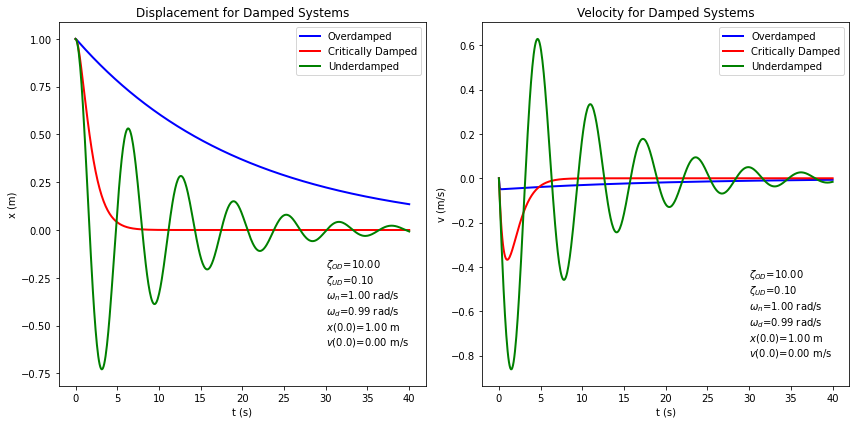

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def xod_of_t(CI,CII,lI,lII,t):
    return CI*exp(lI*t)+CII*exp(lII*t)
def vod_of_t(CI,CII,lI,lII,t):
    return CI*lI*exp(lI*t)+CII*lII*exp(lII*t)

def xcd_of_t(CI,CII,omega_n,t):
    return CI*exp(-omega_n*t)+CII*t*exp(-omega_n*t)
def vcd_of_t(CI,CII,omega_n,t):
    return exp(-omega_n*t)*(-omega_n*CI+CII*(1-omega_n*t))

def xud_of_t(DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(DI*cos(omega_d*t) + DII*sin(omega_d*t))
def vud_of_t(DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-DI*(omega_d*sin(omega_d*t)+zeta*omega_n*cos(omega_d*t)) + DII*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))

zeta_od = 10
omega_n = 1.
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od**2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od**2 - 1))
zeta_ud = 0.1
omega_d = omega_n*sqrt(1-zeta_ud**2)

A = 1    #x(o)
B = 0    #v(0)

CI_od = (B-A*lambda_II)/(lambda_I-lambda_II)
CII_od = (A*lambda_I-B)/(lambda_I-lambda_II)
CI_cd = A
CII_cd = B + omega_n*A
DI = A
DII = (B+A*zeta_ud*omega_n)/omega_d

ti = 0.
tf = 40.
t = np.linspace(ti,tf,500)
x_od = [xod_of_t(CI_od,CII_od,lambda_I,lambda_II,tval) for tval in t]
x_cd = [xcd_of_t(CI_cd,CII_cd,omega_n,tval) for tval in t]
x_ud = [xud_of_t(DI,DII,zeta_ud,omega_n,omega_d,tval) for tval in t]

v_od = [vod_of_t(CI_od,CII_od,lambda_I,lambda_II,tval) for tval in t]
v_cd = [vcd_of_t(CI_cd,CII_cd,omega_n,tval) for tval in t]
v_ud = [vud_of_t(DI,DII,zeta_ud,omega_n,omega_d,tval) for tval in t]

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
plt.plot(t,x_od,label="Overdamped",color="b",linewidth="2.0")
plt.plot(t,x_cd,label="Critically Damped",color="r",linewidth="2.0")
plt.plot(t,x_ud,label="Underdamped",color="g",linewidth="2.0")
plt.title("Displacement for Damped Systems")
omega_n_str = "\omega_n"
omega_d_str = "\omega_d"
zeta_str_OD = "\zeta_{OD}"
zeta_str_UD = "\zeta_{UD}"
x0 = x_cd[0]
v0 = v_cd[0]
txt_loc_x = 0.75*tf
txt_loc_y = -0.60*max(x_od)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str_OD}$={zeta_od:.2f}\n${zeta_str_UD}$={zeta_ud:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()

ax2 = plt.subplot(122)
plt.plot(t,v_od,label="Overdamped",color="b",linewidth="2.0")
plt.plot(t,v_cd,label="Critically Damped",color="r",linewidth="2.0")
plt.plot(t,v_ud,label="Underdamped",color="g",linewidth="2.0")
plt.title("Velocity for Damped Systems")
omega_n_str = "\omega_n"
omega_d_str = "\omega_d"
zeta_str_OD = "\zeta_{OD}"
zeta_str_UD = "\zeta_{UD}"
x0 = x_cd[0]
v0 = v_cd[0]
txt_loc_x = 0.75*tf
txt_loc_y = -.8
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str_OD}$={zeta_od:.2f}\n${zeta_str_UD}$={zeta_ud:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()

plt.tight_layout()
plt.show()